# Task 6 of Second Machine Learning Homework
## Custom Gradient Descent in PyTorch

**Dataset**: Use the same dataset from Problem 1.

**Task**: Implement a custom gradient descent algorithm without using an optimizer from `torch.optim`. Train a linear regression model using this custom implementation and compare the training results with those obtained using PyTorch's `SGD` optimizer.

### Generating dataset

There is no dataset in 1, im assuming we are talking task 2 - using dataset from there

In [3]:
import numpy as np
import torch
from sklearn.model_selection import train_test_split

np.random.seed(0)

# Generate dataset
X = np.random.uniform(-10, 10, 100)
epsilon = np.random.normal(0, 0.1, 100)
y = 3 * X + 4 + epsilon

# Split and scale data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_min, X_train_max = X_train.min(), X_train.max()
y_train_min, y_train_max = y_train.min(), y_train.max()

X_train_scaled = (X_train - X_train_min) / (X_train_max - X_train_min)
y_train_scaled = (y_train - y_train_min) / (y_train_max - y_train_min)

X_test_scaled = (X_test - X_train_min) / (X_train_max - X_train_min)
y_test_scaled = (y_test - y_train_min) / (y_train_max - y_train_min)

# Convert to tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32).view(-1, 1)
y_train_tensor = torch.tensor(y_train_scaled, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32).view(-1, 1)
y_test_tensor = torch.tensor(y_test_scaled, dtype=torch.float32).view(-1, 1)


### Define model and two descent implementations

Doing functions that return just loss, nothing more needed in the task

In [2]:

import torch.nn as nn

# Model
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        return self.linear(x)

# Not using pyTorch optimizer
def custom_gradient_descent(model, X, y, learning_rate=0.01, epochs=100):
    criterion = nn.MSELoss()
    
    loss_history = []
    for epoch in range(epochs):
        y_pred = model(X)
        loss = criterion(y_pred, y)
        loss_history.append(loss.item())
        
        loss.backward()
        
        with torch.no_grad():
            for param in model.parameters():
                param -= learning_rate * param.grad
        
        model.zero_grad()
    
    return loss_history

# Using pyTorch optimizer
def train_with_sgd(model, X, y, learning_rate=0.01, epochs=100):
    criterion = nn.MSELoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
    
    loss_history = []
    for epoch in range(epochs):
        y_pred = model(X)
        loss = criterion(y_pred, y)
        loss_history.append(loss.item())
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    return loss_history

### Train models and plot results

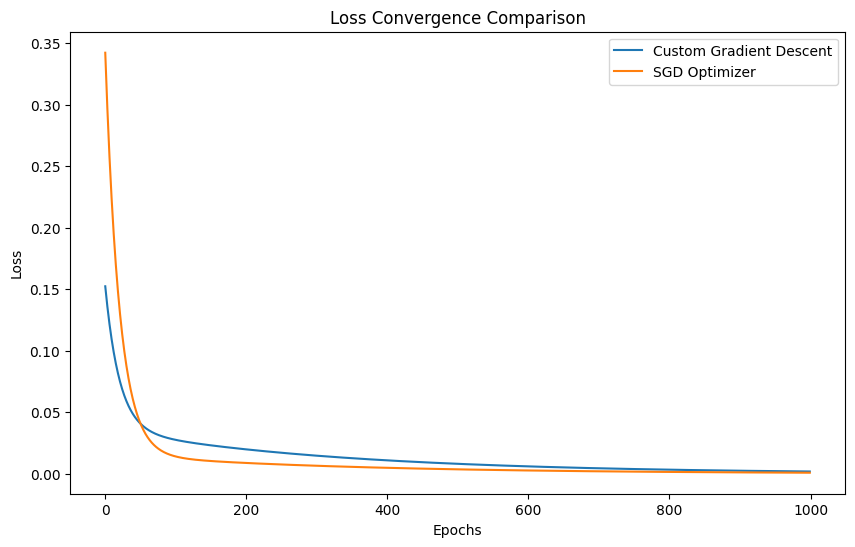

MSE (Custom Gradient Descent): 0.0011
MSE (SGD Optimizer): 0.0005


In [4]:
import matplotlib.pyplot as plt

# Initialize and train models
model_custom = LinearRegressionModel()
model_sgd = LinearRegressionModel()
custom_loss_history = custom_gradient_descent(model_custom, X_train_tensor, y_train_tensor, learning_rate=0.01, epochs=1000)
sgd_loss_history = train_with_sgd(model_sgd, X_train_tensor, y_train_tensor, learning_rate=0.01, epochs=1000)

# Plot history
plt.figure(figsize=(10, 6))
plt.plot(custom_loss_history, label="Custom Gradient Descent")
plt.plot(sgd_loss_history, label="SGD Optimizer")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Convergence Comparison")
plt.legend()
plt.show()

# Evaluate models
def evaluate_model(model, X, y):
    model.eval()
    with torch.no_grad():
        predictions = model(X)
        mse = nn.MSELoss()(predictions, y).item()
    return mse

mse_custom = evaluate_model(model_custom, X_test_tensor, y_test_tensor)
mse_sgd = evaluate_model(model_sgd, X_test_tensor, y_test_tensor)

print(f"MSE (Custom Gradient Descent): {mse_custom:.4f}")
print(f"MSE (SGD Optimizer): {mse_sgd:.4f}")


### Conclusions
It is worth to use SGD optimiser over trying to write own one, loss converges way faster to a good value, and it takes a lot of time for a custom model to catch up.